# Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap

from standard_functions import *

from pandas_profiling import ProfileReport 

In [2]:
params = {
    'continuous_vars' : ['OrderedUnits',
                         'OrderedValue',
                         'materailSize_encoded',
                         'business_encoded',
                         'productGroup_encoded',
                         'division_encoded',
                         'mainColor_encoded',
                         'country_encoded',
                         'webBrowser_encoded',
                         'webCategory_encoded',
                         'webSource_encoded'
                        ],
    
     'categorical_vars' : ['world', 
                           'lifeStyle', 
                           'optionType',
                           'fashionability',
                           'gender',
                          'webChannel',
                          'webConnection',
                          'webDepartment',
                           'webDevice',
                           'paymentMethod',
                           'seasonCategory',
                           'season',
                           'collection'
                          ]
}

# Read dataset

In [3]:
dataset = pd.read_parquet('Dataset/assignment_dataset_anonymized.pq', engine='fastparquet')
dataset_ = dataset.copy()

# Preprocess trainset and testset

In [4]:
dataset_preprocessed = preprocess_function(dataset_, params = params)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
X_train, y_train, X_test, y_test = split_preprocess_dataset(dataset_preprocessed, params)

# Train XGBoost model

In [6]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=20, n_jobs=200, num_parallel_tree=20, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='hist', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
print(); print(model)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=200, num_parallel_tree=20, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='hist', validate_parameters=1, verbosity=None)


# Evaluate Prediction Model

In [7]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [8]:
from sklearn import metrics

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85    394601
           1       0.61      0.33      0.43    144940

    accuracy                           0.76    539541
   macro avg       0.70      0.62      0.64    539541
weighted avg       0.74      0.76      0.74    539541

[[364013  30588]
 [ 97502  47438]]


# Feature Importance

In [9]:
explainer = shap.TreeExplainer(model, data = X_train)

In [10]:
intervational_shap_values = explainer.shap_values(X_test[:10000])

100%|===================| 9961/10000 [02:50<00:00]        

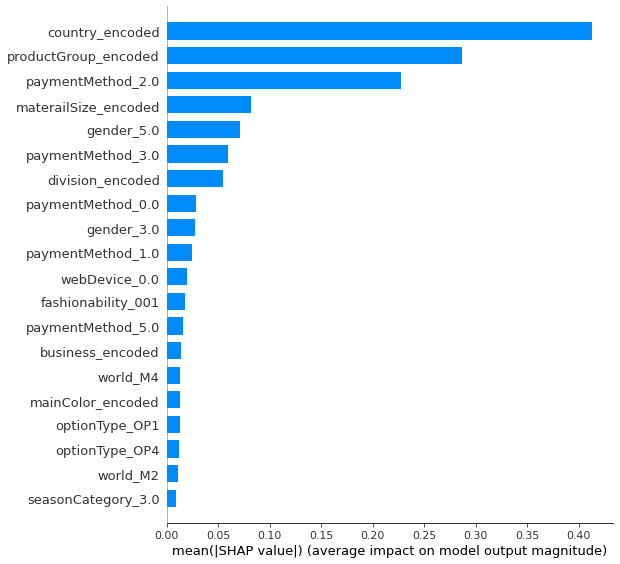

In [11]:
bar_plot = shap.summary_plot(shap_values=intervational_shap_values, features = X_test, plot_type = 'bar')